In [14]:
#importing necceary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
## Reading the dataset
marketing=pd.read_csv('marketing.csv')
marketing.shape

(10037, 12)

In [8]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [9]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [10]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [11]:
## After Examining the Data we can see that converted and is_retained columns should be boolean instead of objects
marketing['converted'] = marketing['converted'].astype('bool')
marketing['is_retained'] = marketing['is_retained'].astype('bool')

In [15]:
## Also we will make new boolean columns for optimizing analysis
channel_dict = {"House Ads": 1, "Instagram": 2,"Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [17]:
##Also we will update the date column in date time format and extract day of week
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [18]:
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                        bool
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled                  object
subscribing_channel            object
is_retained                      bool
channel_code                  float64
is_correct_lang                object
DoW                           float64
dtype: object

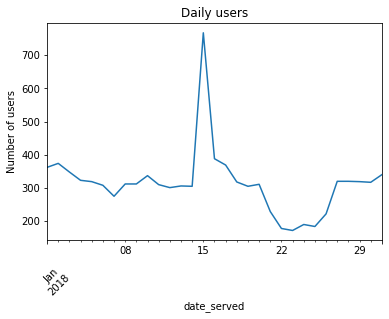

In [19]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users.plot()
plt.title('Daily users')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

### Insights and Next Steps
1.The above plot shows user served per month 

2.Now we will use conversion rate and retention rate as metrics to analyse the compaign 

3.We write separte functions for them 

In [26]:
total = marketing['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

14.09 %


In [30]:
#Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [31]:
#Group by subscribing_channel and calculate conversion
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [32]:
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [40]:
# Conversion_rate by language displayed
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

language_conversion_rate = subscribers/total
print(language_conversion_rate)


language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [42]:
#Conversion rate by Date
total = marketing.groupby(['date_served'])['user_id'].nunique()


subscribers = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total


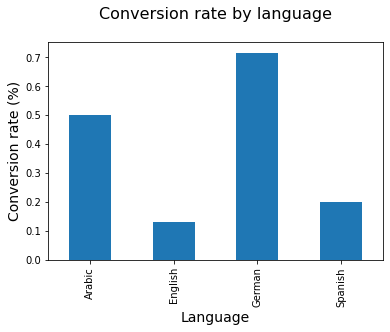

In [43]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.show()

#### We can see that conversion rate is minimum by English while maximum by German

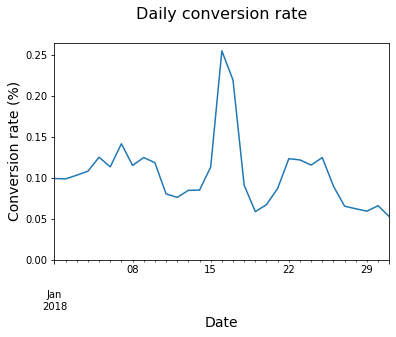

In [45]:
daily_conversion_rate.plot()

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

plt.ylim(0)

plt.show()

In [20]:
def retention_rate(dataframe, column_names):
   # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True]\
               .groupby(column_names)['user_id'].nunique()
   # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True]\
                .groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

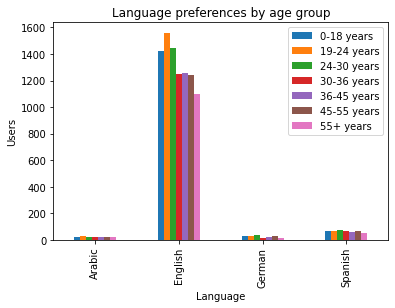

In [46]:
language_age = marketing.groupby(['language_preferred','age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
labels = language_age.columns.values)
plt.show()

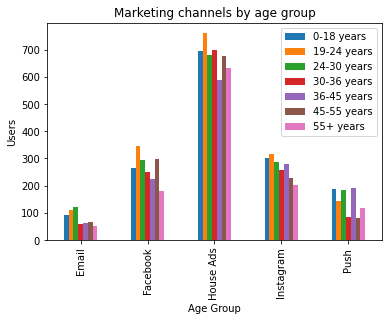

In [47]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()

In [48]:

def conversion_rate(dataframe, column_names):
    '''This function accept DataFrame ,group by column names as input and returns conversion rate'''
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                  .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [49]:
def retention_rate(dataframe, column_names):
     '''This function accept DataFrame ,group by column names as input and returns retention rate'''
   # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True]\
               .groupby(column_names)['user_id'].nunique()
   # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True]\
                .groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

In [50]:
def plotting_conv(dataframe):
     '''Plot individual conversion rate'''
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

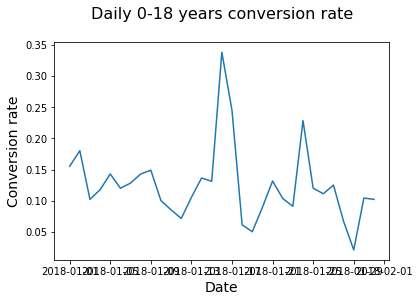

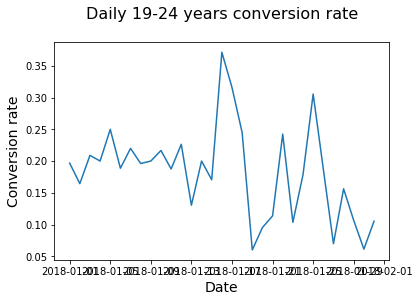

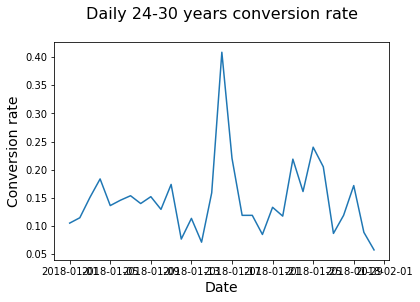

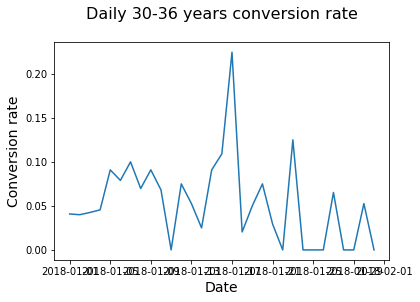

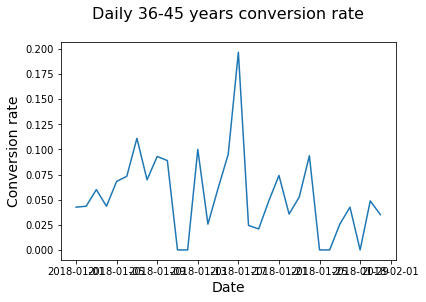

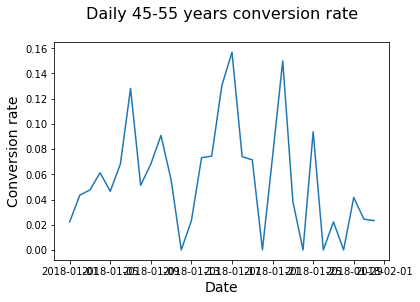

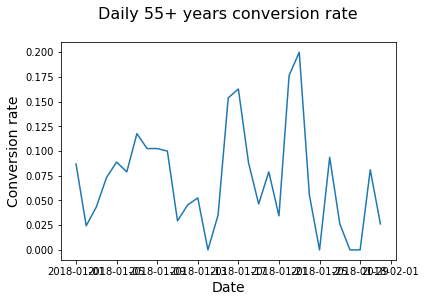

<Figure size 432x288 with 0 Axes>

In [51]:
age_group_conv = conversion_rate(marketing,  ['date_served', 'age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

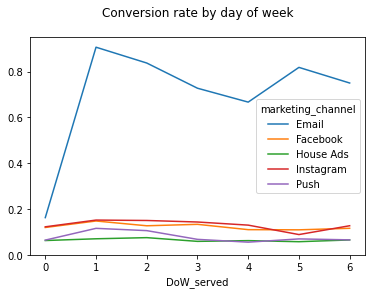

In [52]:
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])


DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

### We will now run an A/B test 

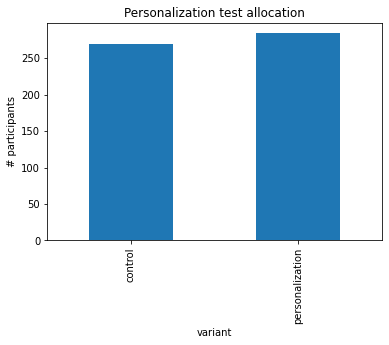

In [53]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [54]:
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 
control = subscribers_df['control'].dropna()
personalization = subscribers_df['personalization'].dropna()
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [58]:
a_mean = np.mean(control)
b_mean = np.mean(personalization)
lift = (b_mean-a_mean)/a_mean
print("lift:", str(round(lift*100, 2)) + '%')

lift: 38.85%
